In [171]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score

[Метрики классификации](#metrica)


In [3]:
data = pd.read_csv('travel_insurance.csv')

In [4]:
data.head(5)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commission (in value),Gender,Age
0,JZI,Airlines,Online,Value Plan,0,12,"TAIWAN, PROVINCE OF CHINA",45.0,15.75,M,39
1,EPX,Travel Agency,Online,Cancellation Plan,0,50,JAPAN,22.0,0.00,None,36
2,EPX,Travel Agency,Online,Cancellation Plan,0,251,BRAZIL,80.0,0.00,None,36
3,EPX,Travel Agency,Online,Cancellation Plan,0,6,INDIA,-10.0,0.00,None,36
4,JZI,Airlines,Online,Value Plan,0,5,CHINA,45.0,15.75,M,34


Признаки, с которыми будем работать:


Agency — название страхового агентства

Agency Type — тип страхового агентства

Distribution Channel — канал продвижения страхового агентства

Product Name — название страхового продукта

Duration — длительность поездки (количество дней)

Destination — направление поездки

Net Sales — сумма продаж ($)

Commission — комиссия страхового агентства ($)

Gender — пол застрахованного

Age — возраст застрахованного

Целевой признак:
Claim (англ. «претензия») — потребовалась ли страховая выплата: «да» — 1, «нет» — 0

In [5]:
data.describe()

,Claim,Duration,Net Sales,Commission (in value),Age
count,50660.000000,50660.000000,50660.000000,50660.000000,50660.000000
mean,0.014864,49.587150,40.749961,9.800755,39.957284
std,0.121009,103.629611,48.470030,19.716468,14.027618
min,0.000000,-2.000000,-389.000000,0.000000,0.000000
25%,0.000000,9.000000,18.000000,0.000000,35.000000
50%,0.000000,22.000000,27.000000,0.000000,36.000000
75%,0.000000,53.000000,49.000000,11.550000,43.000000
max,1.000000,4881.000000,682.000000,262.760000,118.000000



Разбейте исходные данные на две выборки:

обучающую (train);
валидационную (valid). Это 25% исходных данных.

Установите параметр (random_state) равным 12345.

Объявите четыре переменные и запишите в них:

признаки: features_train, features_valid;

целевой признак: target_train, target_valid.

Выведите на экран размеры таблиц, которые хранятся в переменных: features_train и features_valid.

In [16]:
features = data.drop(['Claim'],axis=1)

In [18]:
target = data['Claim']

In [21]:
features_train, features_valid,target_train, target_valid = train_test_split(features,target,test_size=0.25,random_state=12345)

In [23]:
print(features_train.shape)
print(features_valid.shape)

(37995, 10)
(12665, 10)


Принадлежность к категории логистическая регрессия вычисляет по формуле, состоящей из признаков. Они могут быть только численные. Наши данные содержали и категориальные признаки тоже — в этом и была ошибка.

Проверьте, признаки какого типа хранятся в таблице. Выведите их на экран. Затем напечатайте первые пять значений столбца Gender.

In [28]:
print(data.dtypes)

Agency                    object
Agency Type               object
Distribution Channel      object
Product Name              object
Claim                      int64
Duration                   int64
Destination               object
Net Sales                float64
Commission (in value)    float64
Gender                    object
Age                        int64
dtype: object


In [29]:
print(data['Gender'].head(5))

0       M
1    None
2    None
3    None
4       M
Name: Gender, dtype: object


Прямое кодирование
Преобразовать категориальные признаки в численные поможет техника прямого кодирования, или отображения (англ. One-Hot Encoding, OHE).
Принцип работы One-Hot Encoding объясним на значениях признака Gender.
Для каждого значения признака Gender (F, M, None) создаётся столбец: 
Gender_F (от англ. female, «женщина»),
Gender_M (от англ. male, «мужчина»),
Gender_None (данных о поле нет).
Когда ставить единицу в добавленные столбцы, зависит от того, каково значение Gender. Например, если F, то 1 записывается в столбец Gender_F, а M — в Gender_M. 
image

 
Резюмируем. Техникой OHE категориальные признаки переводятся в численные в два этапа:
Для каждого значения признака создаётся новый столбец;
Если объекту категория подходит, присваивается 1, если нет — 0.
Новые признаки (Gender_F, Gender_M, Gender_None) называются дамми-переменными, или дамми-признаками (англ. dummy variable, «фиктивная переменная»).
Для прямого кодирования в библиотеке pandas есть функция pd.get_dummies() (от англ. «получить фиктивные переменные»).

## Преобразуйте колонку Gender техникой OHE.
Вызовите функцию pd.get_dummies() и напечатайте на экране первые пять записей изменённой таблицы.

In [32]:
print(pd.get_dummies(data['Gender'].head(5)))

   M  None
0  1     0
1  0     1
2  0     1
3  0     1
4  1     0


Когда данных в избытке, можно угодить в ловушку фиктивных признаков.

### Дамми-ловушка

Пример:
тобы подать документы на шенгенскую визу, нужно доказать, что деньги у вас есть.

Вы решили перестраховаться, поэтому взяли и выписку с банковского счёта, и справку с работы, и 2-НДФЛ. Хотя визовому центру достаточно двух документов. Вашей модели лишняя информация тоже не очень-то нужна. 

Если оставить всё как есть, обучаться она будет сложнее. 
В таблицу добавились три новых столбца. Поскольку они сильно связаны между собой, один удалим без сожаления. Восстановить столбец можно по оставшимся двум. Так мы не попадём в дамми-ловушку (англ. dummy trap, «ловушка фиктивных признаков»).


Столбец уберём вызовом функции:

### pd.get_dummies() с аргументом drop_first (от англ. «сбросьте первый»).

Он удаляет первую колонку и передаётся как drop_first=True или drop_first=False (True — первый столбец сбрасывается, False — не сбрасывается).

In [35]:
print(pd.get_dummies(data['Gender'],drop_first=True).head(5))

   M  None
0  1     0
1  0     1
2  0     1
3  0     1
4  1     0



Примените прямое кодирование ко всему датафрейму. Вызовите функцию pd.get_dummies() c аргументом drop_first. Сохраните таблицу в переменной data_ohe.
Выведите на экран первые три строки преобразованной таблицы.

In [37]:
data_ohe = pd.get_dummies(data,drop_first=True)

In [39]:
data_ohe.head(3)

,Claim,Duration,Net Sales,Commission (in value),Age,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,...,Destination_UNITED STATES,Destination_URUGUAY,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,Destination_ZAMBIA,Destination_ZIMBABWE,Gender_M,Gender_None
0,0,12,45.0,15.75,39,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,50,22.0,0.00,36,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,251,80.0,0.00,36,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Разбейте исходные данные на две выборки в соотношении 75:25 (%):
обучающую (train);
валидационную (valid).

Объявите четыре переменные и запишите в них:
признаки: features_train, features_valid;
целевой признак: target_train, target_valid.

Вам предстоит освоить альтернативный способ работы с функцией train_test_split(): когда на вход подаются две переменные (признаки и целевой признак). Поработайте с документацией.

Обучите логистическую регрессию.
Напечатайте на экране текст "Обучено!" (уже в прекоде). Так вы убедитесь, что код выполнился без ошибок.

Вложите и в train_test_split(), и в LogisticRegression() параметр random_state, равный 12345.

In [57]:
data_ohe = pd.get_dummies(data, drop_first=True)
target = data_ohe['Claim']
features = data_ohe.drop('Claim', axis=1)

In [60]:
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size = 0.25, random_state = 12345)

In [61]:
model = LogisticRegression(random_state=12345,solver='liblinear')
model.fit(features_train, target_train)
print("Обучено!")

Обучено!


### Порядковое кодирование

Расскажем о другой технике кодирования признаков в решающем дереве и случайном лесе.

Ordinal Encoding (от англ. «кодирование по номеру категории»). Она работает так:

Фиксируется, какой цифрой кодируется класс;

Цифры размещаются в столбце.

Техника подходит для преобразования признаков в решающем дереве и случайном лесе (он состоит из деревьев).

Чтобы выполнить кодирование, в sklearn есть структура данных OrdinalEncoder (англ. «порядковый кодировщик»). Она находится в модуле sklearn.preprocessing (от англ. «предобработка»). 
Импортируем OrdinalEncoder из библиотеки:

from sklearn.preprocessing import OrdinalEncoder 
Преобразование выполняется в три этапа: 

Создаём объект этой структуры данных.
encoder = OrdinalEncoder() 

Чтобы получить список категориальных признаков, вызываем метод fit() — как и в обучении модели. Передаём ему данные как аргумент.
encoder.fit(data) 

Преобразуем данные функцией transform() (англ. «преобразовать»). Изменённые данные будут храниться в переменной data_ordinal (англ. «порядковые данные»).
data_ordinal = encoder.transform(data) 

Чтобы код добавил названия столбцов, оформим данные в структуру DataFrame():
### data_ordinal = pd.DataFrame(encoder.transform(data), columns=data.columns) 
                                                      
Если преобразование признаков требуется лишь один раз, как в нашей задаче, код можно упростить вызовом функции fit_transform() (от англ. «подогнать и преобразовать»).
Она объединяет функции: fit() и transform(). 


### data_ordinal = pd.DataFrame(encoder.fit_transform(data), columns=data.columns) 

Преобразуйте признаки техникой Ordinal Encoding.
Импортируйте OrdinalEncoder из модуля sklearn.preprocessing. 

Сохраните результат в переменной data_ordinal. Оформите данные в структуру DataFrame().

Напечатайте на экране первые пять строк таблицыю

In [63]:
encoder = OrdinalEncoder()

In [66]:
data_ordinal = pd.DataFrame(encoder.fit_transform(data), columns = data.columns)

In [67]:
print(data_ordinal.head(5))

   Agency  Agency Type  Distribution Channel  Product Name  Claim  Duration  \
0     9.0          0.0                   1.0          24.0    0.0      14.0   
1     7.0          1.0                   1.0          10.0    0.0      52.0   
2     7.0          1.0                   1.0          10.0    0.0     253.0   
3     7.0          1.0                   1.0          10.0    0.0       8.0   
4     9.0          0.0                   1.0          24.0    0.0       7.0   

   Destination  Net Sales  Commission (in value)  Gender   Age  
0        121.0      602.0                  486.0     1.0  37.0  
1         61.0      470.0                    0.0     2.0  34.0  
2         16.0      735.0                    0.0     2.0  34.0  
3         54.0      121.0                    0.0     2.0  34.0  
4         24.0      602.0                  486.0     1.0  32.0  



Обучите решающее дерево на преобразованных данных. Напечатайте на экране текст  "Обучено!"  (уже в прекоде). Так вы убедитесь, что код выполнился без ошибок

In [69]:
features = data_ordinal.drop('Claim',axis=1)
target = data_ordinal['Claim']

In [70]:
features_train, features_valid, target_train, target_valid = train_test_split(features,target,test_size=0.25,random_state=12345)

In [74]:
model = DecisionTreeClassifier(random_state=12345)

In [75]:
model.fit(features_train,target_train)

DecisionTreeClassifier(random_state=12345)

In [76]:
print('Обучено!')

Обучено!


### Подведём итог:

Когда все признаки должны стать количественными-подходит техника OHE;

Если все признаки категориальные, и их нужно преобразовать в числа — Ordinal Encoding.

Почему Ordinal Encoding не подходит для логистической регрессии? Она всё норовит посчитать по формуле. Если речь идёт о признаке Age, то это разумно, а вот с Gender есть трудности. Например, сложив значения «1» и «0» («женщина» и «мужчина») и разделив на «2», «средний пол» не получить.

### Масштабирование признаков

Что делать, если у признаков разный масштаб? Стандартизировать их!
В данных есть столбцы: Age и Commission. Допустим, возможен возраст от 0 до 100 лет, а страховая комиссия — от 100 долларов до 1000. Значения и их разбросы в столбце Commission больше, поэтому алгоритм автоматически решит, что этот признак важнее возраста. А это не так: все признаки значимы.
Чтобы избежать этой ловушки, признаки масштабируют — приводят к одному масштабу.
Один из методов масштабирования — стандартизация данных. 
Предположим, что все признаки распределены нормально, среднее (англ. mean, M) и дисперсия (лат. dispersio, D) определяются по выборке. Значения признака преобразуются по формуле:
Новое значение = Старое значение - М, поделённое на квадратный корень из D.
У нового признака устанавливается среднее, равное 0, и дисперсия, равная 1.
В sklearn есть отдельная структура для стандартизации данных — StandardScaler (от англ. «преобразователь масштаба методом стандартизации»). Он находится в модуле sklearn.preprocessing. 

Стандартизируйте численные признаки. Импортируйте StandardScaler из модуля sklearn.preprocessing.
Создайте объект структуры StandardScaler() и настройте его на обучающих данных. В переменной numeric уже есть список всех численных признаков.
Сохраните преобразованные обучающую и валидационную выборки в переменных: features_train и features_valid. 
Напечатайте на экране первые пять строк таблицы.

При записи изменённых признаков в исходный датафрейм код может вызывать предупреждение SettingWithCopy. Причина в особенности поведения sklearn и pandas.  Специалисты уже привыкли игнорировать такое сообщение.

In [88]:
#Чтобы предупреждение не появлялось, в код добавляют строчку:
pd.options.mode.chained_assignment = None
scaller = StandardScaler()
scaller.fit(features_train[numeric])

StandardScaler()

In [89]:
numeric = ['Duration', 'Net Sales', 'Commission (in value)', 'Age']

In [90]:
features_train[numeric] = scaller.transform(features_train[numeric])
features_valid[numeric] = scaller.transform(features_valid[numeric])

In [91]:
print(features_train.head(5))

       Agency  Agency Type  Distribution Channel  Product Name  Duration  \
33312     7.0          1.0                   1.0          10.0  0.422711   
50154     7.0          1.0                   1.0          10.0 -0.392566   
26729     7.0          1.0                   1.0          10.0 -0.492687   
37842     7.0          1.0                   1.0           1.0 -0.077897   
23588     7.0          1.0                   1.0           1.0 -0.564203   

       Destination  Net Sales  Commission (in value)  Gender       Age  
33312         24.0  -0.638946              -0.770269     2.0 -0.298857  
50154        113.0  -0.732311              -0.770269     2.0 -0.298857  
26729         76.0  -1.053254              -0.770269     2.0 -0.807193  
37842        124.0   0.428917              -0.770269     2.0 -0.383579  
23588         76.0  -0.388027              -0.770269     2.0 -0.468302  


## Метрики классификации
<a id='metrica'></a>

In [122]:
datam = pd.read_csv('travel_insurance_preprocessed.csv')

Обучите модель решающего дерева.

Посчитайте значение accuracy на валидационной выборке.

Сохраните результат в переменной accuracy_valid.

Напечатайте его на экране.

In [123]:
features = datam.drop('Claim',axis=1)
target = datam['Claim']

In [124]:
features_train, features_valid, target_train, target_valid = train_test_split(features,target,test_size=0.25,random_state=12345)

In [125]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train,target_train)

DecisionTreeClassifier(random_state=12345)

In [126]:
predict_valid = model.predict(features_valid)

In [127]:
accuracy_valid = accuracy_score(target_valid,predict_valid)

In [128]:
print(accuracy_valid)

0.974496644295302


## Проверка адекватности модели

Доля правильных ответов — 97%. Это много или мало?

Исследуем целевой признак.
Чтобы оценить адекватность модели, проверим, как часто в целевом признаке встречается класс «1» или «0».

Количество уникальных значений подсчитывается методом value_counts().

Он группирует строго одинаковые величины.


Для подсчёта классов в целевом признаке примените метод value_counts(). Сделайте частоты относительными (от 0 до 1): в этом поможет документация Pandas.
Значения сохраните в переменной class_frequency. Напечатайте их на экране. 
Методом plot() c аргументом kind='bar' постройте диаграмму.

In [129]:
class_frequency = data['Claim'].value_counts(normalize = True)

In [130]:
print(class_frequency)

0    0.985136
1    0.014864
Name: Claim, dtype: float64


<AxesSubplot:>

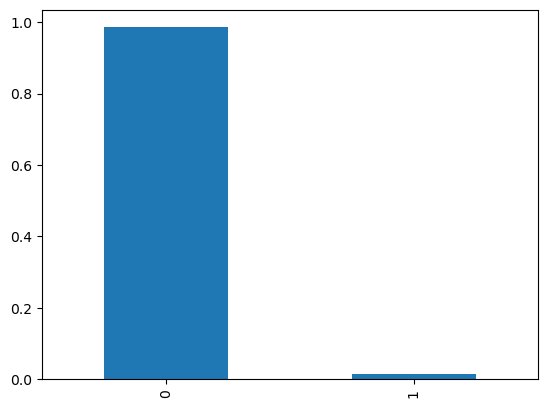

In [131]:
class_frequency.plot(kind='bar')

Проанализируйте частоты классов в результатах предсказаний решающего дерева (переменная predicted_valid). 

Всё то же самое:

Примените метод value_counts(). Сделайте частоты относительными.

Значения сохраните в переменной class_frequency. Напечатайте их на экране.

Методом plot() c аргументом kind='bar' постройте диаграмму.

In [134]:
# чтобы работала функция value_counts(),
# мы преобразовали результат к pd.Series 
predict_valid = pd.Series(model.predict(features_valid))

0    0.985946
1    0.014054
dtype: float64


<AxesSubplot:>

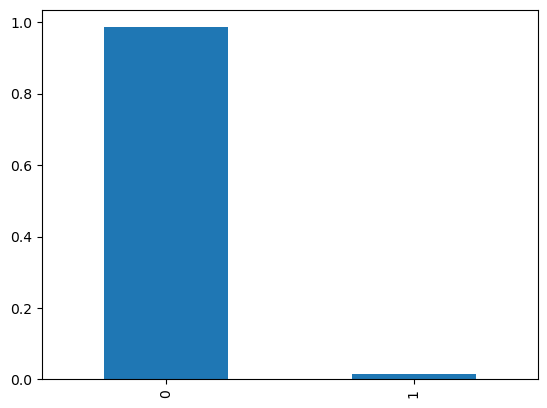

In [135]:
class_frequency = predict_valid.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind = 'bar')

Cоздайте константную модель: любому объекту она прогнозирует класс «0». Сохраните её предсказания в переменной target_pred_constant. 
Напечатайте на экране значение accuracy.

In [136]:
target_pred_constant = pd.Series(0, index=target.index)
print(accuracy_score(target, target_pred_constant))  

0.9851362021318595


Вы уже знаете, что класс с меткой «1» называется положительным, с меткой «0» — отрицательным.
Если сравнить эти ответы с предсказаниями, получается такое деление:
истинно положительные (англ. True Positive, TP) и истинно отрицательные ответы (англ. True Negative, TN);
ложноположительные (англ. False Positive, FP) и ложноотрицательные ответы (англ. False Negative, FN).
Резюмируем. Характеристики «положительный» и «отрицательный» относятся к предсказанию, а «истинный» и «ложный» — к его правильности.

Истинно положительные ответы
Справиться с дисбалансом и более точно классифицировать ответы помогут новые метрики.
Что значит истинно положительный ответ (TP)? Модель пометила объект единицей, и его настоящее значение тоже — 1.
В нашей задаче истинно положительный ответ — это количество застрахованных, которые:
по прогнозу модели обратились за компенсацией;
фактически запросили страховую выплату.

In [151]:
#пример предсказаний и правильных ответов.
#Посчитайте количество TP-ответов и напечатайте результат на экране.
target = pd.Series([1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1])
predictions = pd.Series([1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1])

In [152]:
print(len([i for i in range(len(target)) if target[i]==1 and predictions[i]==1]))

5


Истинно отрицательные ответы
Если предсказанное и фактическое значение класса отрицательные, ответ истинно отрицательный.
В нашей задаче истинно отрицательный ответ (TN) — это количество застрахованных, которые:
по прогнозу модели не запросили выплату;
фактически не обратились за компенсацией по страховке.

In [153]:
#Посчитайте количество TN-ответов.
#Напечатайте результат на экране.
print(len([i for i in range(len(target)) if target[i]==0 and predictions[i]==0]))

4


### Ложноположительные ответы

Алгоритмы имеют право на ошибки. Только двух видов.
Ошибка первого рода — это ложноположительные ответы (FP). Они возникают, когда модель предсказала «1», а вот действительное значение класса — «0».

В нашей задаче ложноположительный ответ — это количество застрахованных, которые:

по прогнозу модели запросили выплату;

фактически не обратились за компенсацией.

In [154]:
print(len([i for i in range(len(target)) if target[i]==0 and predictions[i]==1]))

3


### Ложноотрицательные ответы

Ошибка второго рода — ложноотрицательные ответы (FN).
Ложноотрицательные ответы появляются, когда модель предсказала «0», а действительное значение класса — «1».

В нашей задаче ложноотрицательный ответ — это количество застрахованных, которые:

по прогнозу модели не запросили выплату;

фактически обратились за компенсацией.

In [155]:
print(len([i for i in range(len(target)) if target[i]==1 and predictions[i]==0]))

2


Матрица ошибок
TP, FP, TN, FN собираются в одну таблицу — матрицу ошибок, или матрицу неточностей (англ. сonfusion matrix).
Матрица формируется так:
по горизонтали («Предсказания») располагаются метки алгоритма от 0 до 1;
по вертикали («Ответы») — истинные метки класса от 0 до 1.
Что получаем:
По главной диагонали (от верхнего левого угла) выстроены правильные прогнозы:
TN в левом верхнем углу;
TP в правом нижнем углу.
Вне главной диагонали — ошибочные варианты:
FP в правом верхнем углу;
FN в левом нижнем углу.

   0    _______  TrueNegative     _____FalsePositive
   
   1    _______   FalseNegative   ______ TruePositive
   
             0               1
             
Наглядно представить результаты вычислений метрик точности и полноты позволяет матрица ошибок.

Матрица неточностей находится в знакомом модуле sklearn.metrics. 

Функция confusion_matrix() принимает на вход верные ответы и предсказания, а возвращает матрицу ошибок.

In [159]:
# Рассчитайте матрицу ошибок функцией confusion_matrix(). 
# Импортируйте её из модуля sklearn.metrics.
# Напечатайте результат на экране.
print(confusion_matrix(target,predictions))

[[4 3]
 [2 5]]


Постройте матрицу ошибок для решающего дерева.

Как и в прошлом задании, вызовите функцию confusion_matrix(). 

Напечатайте результат на экране.

In [179]:
data = pd.read_csv('travel_insurance_preprocessed.csv')

In [180]:
features = data.drop('Claim',axis=1)
target = data['Claim']

In [181]:
ftrs_tr,ftrs_valid,trgt_tr,trgt_valid = train_test_split(features,target,test_size=0.25,random_state=12345)

In [182]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(ftrs_tr,trgt_tr)

DecisionTreeClassifier(random_state=12345)

In [183]:
predicted_valid = model.predict(ftrs_valid)

In [184]:
print( confusion_matrix(trgt_valid,predicted_valid))

[[12330   166]
 [  157    12]]


### Полнота
Матрица ошибок поможет построить новые метрики. Начнём с полноты (англ. recall).

Полнота выявляет, какую долю положительных среди всех ответов выделила модель. Обычно они на вес золота, и важно понимать, как хорошо модель их находит. 
Recall рассчитывается по такой формуле:

### Recall = TP / (TP + FN)

Разберём на примере нашей задачи:
за компенсацией обратились 100 застрахованных. Это количество всех положительных объектов, или TP + FN;

модель определила из них правильно только 20;

recall равна 0.2.
Полнота — это доля TP-ответов среди всех, у которых истинная метка 1.

Хорошо, когда значение recall близко к единице: модель хорошо ищет положительные объекты. 

Если ближе к нулю — модель надо перепроверить и починить.



Найдите в модуле sklearn.metrics функцию, которая отвечает за вычисление полноты.

Импортируйте её. 

Функция принимает на вход верные ответы и предсказания, а возвращает долю правильных ответов, найденных моделью. Напечатайте результат на экране.

In [185]:
print(recall_score(trgt_valid,predicted_valid))

0.07100591715976332
